In [1]:
import os
import logging
import networkx as nx
import numpy as np
#import seaborn as sns
import random
import math
from scipy.stats import truncnorm
import time
import copy
import matplotlib.pyplot as plt
from random import sample
import itertools

In [2]:
lASG = "./anomaly_associate_graph.txt"
lRSG = "./random_sample_graph.txt"
lAIG = './opt_TUDCC3.txt'
lOG =  './filter_events.txt'

lASGevents = []

lAIGevents = []
lOGevents = []
lASGraph = nx.DiGraph()

lAIGraph = nx.DiGraph()
lOGraph = nx.DiGraph()

In [3]:
event = 0
day2 = 1
lRSGevents = []
lRSGraph = nx.DiGraph()
with open(lRSG,'r',encoding='utf-8') as fi:
    while True:
        line = fi.readline()
        event=event+1
        #print(event)
        if not line:
            break
        l = line.strip().split(',')
        if(int(l[0])>(day2*86400)):
            #print("*****",int(l[0]))
            lRSGevents.append(event)
            day2+=1
            #print(day2)
            event = 0
        lRSGraph.add_edge(l[3],l[6])
fi.close()

In [4]:
event = 0
day1 = 1
with open(lASG,'r',encoding='utf-8') as fi:
    while True:
        line = fi.readline()
        event+=1
        if not line:
            break
        l = line.strip().split(',')
        if(int(l[0])>(day1*86400)):
            lASGevents.append(event)
            day1+=1
            event = 0
        lASGraph.add_edge(l[3],l[6])
fi.close()

In [5]:
event = 0
day3 = 1
with open(lAIG,'r',encoding='utf-8') as fi:
    while True:
        line = fi.readline()
        event+=1
        if not line:
            break
        l = line.strip().split(',')
        if(int(l[0])>(day3*86400)):
            lAIGevents.append(event)
            day3+=1
            event = 0
        lAIGraph.add_edge(l[3],l[6])
fi.close()

In [6]:
event = 0
day4 = 1
with open(lOG,'r',encoding='utf-8') as fi:
    while True:
        line = fi.readline()
        event+=1
        if not line:
            break
        l = line.strip().split(',')
        if(int(l[0])>(day4*86400)):
            lOGevents.append(event)
            day4+=1
            event = 0
        lOGraph.add_edge(l[3],l[6])
fi.close()

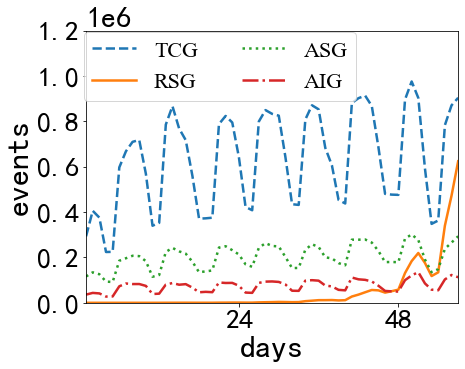

In [9]:
import matplotlib.pyplot as plt
from pylab import *                                 
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.subplots(figsize=(6.8,5.4))
lx0= np.arange(1,day4)
lx1= np.arange(1,day1)
lx2= np.arange(1,day2)
lx3= np.arange(1,day3)
ly0=lOGevents
ly1=lASGevents
ly2=lRSGevents
ly3=lAIGevents
lO, = plt.plot(lx0, ly0, linestyle = 'dashed' , mec='blue', mfc='w',label=u'TCG',linewidth = 2.5,markersize=2)#'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
lB, = plt.plot(lx2, ly2,  mec='purple', mfc='w',label=u'RSG',linewidth = 2.5,markersize=2)
lA, = plt.plot(lx1, ly1, linestyle = ':', mec='green', mfc='w',label=u'ASG',linewidth = 2.5,markersize=2)
lC, = plt.plot(lx3, ly3, linestyle = '-.', mec='red', mfc='w',label=u'AIG',linewidth = 2.5,markersize=2)
font1 = {'family':'Times New Roman',
         'weight':'normal',
         'size':22
         }
legend = plt.legend(handles=[lO,lB,lA,lC], prop=font1,loc='lower center',ncol=2,bbox_to_anchor=(0.36,0.70))
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(100000)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.margins(0)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
plt.subplots_adjust(bottom=0.18,left = 0.14)
plt.xlabel("days",fontsize = 32) 
plt.ylabel("events",fontsize = 32)
# plt.ylim(0,1100000)
ax.set_yticks(range(0,1400000,200000))
x_major_locator=MultipleLocator(24)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.tick_params(axis='both', which='major', labelsize=28)
plt.gca().yaxis.get_offset_text().set_fontsize(30)
#plt.title("\") 
#plt.axis('off')
# plt.title('',fontsize = 14)
plt.savefig("events_change.png",dpi=500,bbox_inches = 'tight')
plt.show()


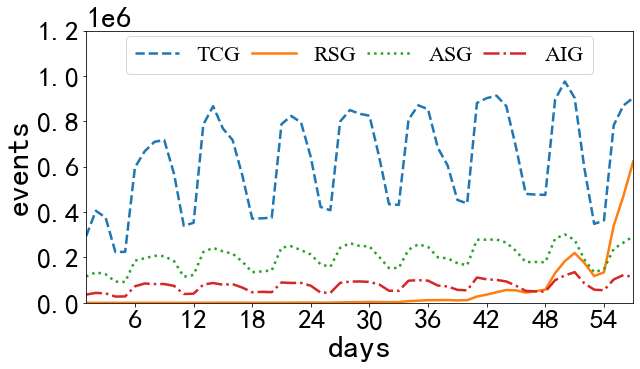

In [13]:
import matplotlib.pyplot as plt
from pylab import *                                 
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.subplots(figsize=(10,5.4))
lx0= np.arange(1,day4)
lx1= np.arange(1,day1)
lx2= np.arange(1,day2)
lx3= np.arange(1,day3)
ly0=lOGevents
ly1=lASGevents
ly2=lRSGevents
ly3=lAIGevents
lO, = plt.plot(lx0, ly0, linestyle = 'dashed' , mec='blue', mfc='w',label=u'TCG',linewidth = 2.5,markersize=2)#'-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
lB, = plt.plot(lx2, ly2,  mec='purple', mfc='w',label=u'RSG',linewidth = 2.5,markersize=2)
lA, = plt.plot(lx1, ly1, linestyle = ':', mec='green', mfc='w',label=u'ASG',linewidth = 2.5,markersize=2)
lC, = plt.plot(lx3, ly3, linestyle = '-.', mec='red', mfc='w',label=u'AIG',linewidth = 2.5,markersize=2)
font1 = {'family':'Times New Roman',
         'weight':'normal',
         'size':22
         }
legend = plt.legend(handles=[lO,lB,lA,lC], prop=font1,loc='lower center',ncol=4,bbox_to_anchor=(0.5,0.80), columnspacing=0.5)
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(100000)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.margins(0)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
plt.subplots_adjust(bottom=0.18,left = 0.14)
plt.xlabel("days",fontsize = 32) 
plt.ylabel("events",fontsize = 32)
# plt.ylim(0,1100000)
ax.set_yticks(range(0,1400000,200000))
x_major_locator=MultipleLocator(6)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.tick_params(axis='both', which='major', labelsize=28)
plt.gca().yaxis.get_offset_text().set_fontsize(30)
#plt.title("\") 
#plt.axis('off')
# plt.title('',fontsize = 14)
plt.savefig("events_change.png",dpi=500,bbox_inches = 'tight')
plt.show()


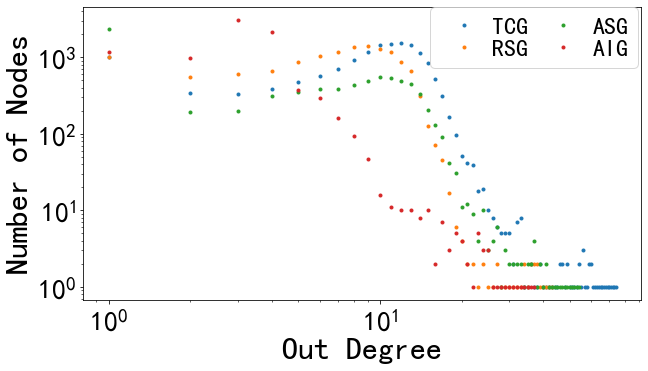

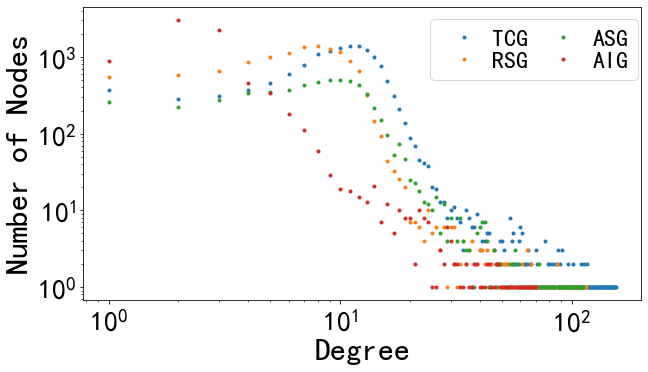

In [64]:
from collections import Counter


OutDegree1 = dict(lOGraph.out_degree())
OutDegree2 = dict(lRSGraph.out_degree())
OutDegree3 = dict(lASGraph.out_degree())
OutDegree4 = dict(lAIGraph.out_degree())
#print(OutDegree)

InDegree1 = dict(lOGraph.degree())
InDegree2 = dict(lRSGraph.degree())
InDegree3 = dict(lASGraph.degree())
InDegree4 = dict(lAIGraph.degree())

listOut1 = []
for type,value in OutDegree1.items():
    tmpes = value
    listOut1.append(tmpes)
listOut2 = []
for type,value in OutDegree2.items():
    tmpes = value
    listOut2.append(tmpes)
listOut3 = []
for type,value in OutDegree3.items():
    tmpes = value
    listOut3.append(tmpes)
listOut4 = []
for type,value in OutDegree4.items():
    tmpes = value
    listOut4.append(tmpes)
#print(list1)

listIn1 = []
for type,value in InDegree1.items():
    tmpes = value
    listIn1.append(tmpes)
listIn2 = []
for type,value in InDegree2.items():
    tmpes = value
    listIn2.append(tmpes)
listIn3 = []
for type,value in InDegree3.items():
    tmpes = value
    listIn3.append(tmpes)
listIn4 = []
for type,value in InDegree4.items():
    tmpes = value
    listIn4.append(tmpes)


nodes1 = []
for n in lOGraph.nodes():
    nodes1.append(n)
nodes2 = []
for n in lRSGraph.nodes():
    nodes2.append(n)
nodes3 = []
for n in lASGraph.nodes():
    nodes3.append(n)
nodes4 = []
for n in lAIGraph.nodes():
    nodes4.append(n)
#print(nodes)



Outcounts1 = Counter(listOut1)
Outcounts2 = Counter(listOut2)
Outcounts3 = Counter(listOut3)
Outcounts4 = Counter(listOut4)
#print(counts)


Incounts1 = Counter(listIn1)
Incounts2 = Counter(listIn2)
Incounts3 = Counter(listIn3)
Incounts4 = Counter(listIn4)
#print(counts_1)


Outcounts_sort1 = sorted(Outcounts1.items(), key=lambda x: x[0]) #按键值大小排序
Outcounts_sort1 = dict(Outcounts_sort1)
Outcounts_sort2 = sorted(Outcounts2.items(), key=lambda x: x[0]) #按键值大小排序
Outcounts_sort2 = dict(Outcounts_sort2)
Outcounts_sort3 = sorted(Outcounts3.items(), key=lambda x: x[0]) #按键值大小排序
Outcounts_sort3 = dict(Outcounts_sort3)
Outcounts_sort4 = sorted(Outcounts4.items(), key=lambda x: x[0]) #按键值大小排序
Outcounts_sort4 = dict(Outcounts_sort4)
#dict(counts_sort)


Incounts_sort1 = sorted(Incounts1.items(), key=lambda x: x[0]) #按键值大小排序
Incounts_sort1 = dict(Incounts_sort1)
Incounts_sort2 = sorted(Incounts2.items(), key=lambda x: x[0]) #按键值大小排序
Incounts_sort2 = dict(Incounts_sort2)
Incounts_sort3 = sorted(Incounts3.items(), key=lambda x: x[0]) #按键值大小排序
Incounts_sort3 = dict(Incounts_sort3)
Incounts_sort4 = sorted(Incounts4.items(), key=lambda x: x[0]) #按键值大小排序
Incounts_sort4 = dict(Incounts_sort4)


Outx_label1 = []
for type,value in Outcounts_sort1.items():
    tmpes = type
    Outx_label1.append(tmpes)

Outx_label2 = []
for type,value in Outcounts_sort2.items():
    tmpes = type
    Outx_label2.append(tmpes)
Outx_label3 = []
for type,value in Outcounts_sort3.items():
    tmpes = type
    Outx_label3.append(tmpes)
Outx_label4 = []
for type,value in Outcounts_sort4.items():
    tmpes = type
    Outx_label4.append(tmpes)
# print(x_label)
# print(len(x_label))


Inx_label1= []
for type,value in Incounts_sort1.items():
    tmpes = type
    Inx_label1.append(tmpes)
Inx_label2= []
for type,value in Incounts_sort2.items():
    tmpes = type
    Inx_label2.append(tmpes)
Inx_label3= []
for type,value in Incounts_sort3.items():
    tmpes = type
    Inx_label3.append(tmpes)
Inx_label4= []
for type,value in Incounts_sort4.items():
    tmpes = type
    Inx_label4.append(tmpes)
# print(x_label_1)
# print(len(x_label_1))


Outx_data1 = range(len(Outx_label1))
Outx_data2 = range(len(Outx_label2))
Outx_data3 = range(len(Outx_label3))
Outx_data4 = range(len(Outx_label4))
#print(x_data)


Inx_data1 = range(len(Inx_label1))
Inx_data2 = range(len(Inx_label2))
Inx_data3 = range(len(Inx_label3))
Inx_data4 = range(len(Inx_label4))
#print(x_data_1)


Outy_data1 = []
for type,value in Outcounts_sort1.items():
    tmpes = value
    Outy_data1.append(tmpes)
Outy_data2 = []
for type,value in Outcounts_sort2.items():
    tmpes = value
    Outy_data2.append(tmpes)
Outy_data3 = []
for type,value in Outcounts_sort3.items():
    tmpes = value
    Outy_data3.append(tmpes)
Outy_data4 = []
for type,value in Outcounts_sort4.items():
    tmpes = value
    Outy_data4.append(tmpes)
# print(y_data)
# print(len(y_data))


Iny_data1 = []
for type,value in Incounts_sort1.items():
    tmpes = value
    Iny_data1.append(tmpes)
    
Iny_data2 = []
for type,value in Incounts_sort2.items():
    tmpes = value
    Iny_data2.append(tmpes)
    
Iny_data3 = []
for type,value in Incounts_sort3.items():
    tmpes = value
    Iny_data3.append(tmpes)
Iny_data4 = []
for type,value in Incounts_sort4.items():
    tmpes = value
    Iny_data4.append(tmpes)
# print(y_data_1)
# print(len(y_data_1))
plt.subplots(figsize=(10,5.4))

plt.loglog(Outx_data1,Outy_data1,'.')
plt.loglog(Outx_data2,Outy_data2,'.')
plt.loglog(Outx_data3,Outy_data3,'.')
plt.loglog(Outx_data4,Outy_data4,'.')
plt.legend(['TCG','RSG','ASG','AIG'],fontsize=24,ncol=2,bbox_to_anchor=(0.6,0.75),columnspacing=0.45, labelspacing=0.1, handletextpad=0.2) 
#plt.legend(['Original Graph','Sample Graph'],fontsize=10)
plt.xlabel('Out Degree',fontsize = 32)
plt.ylabel('Number of Nodes',fontsize = 32)
ax=plt.gca()
ax.tick_params(axis='both', which='major', labelsize=28)
plt.gca().yaxis.get_offset_text().set_fontsize(30)
plt.savefig("outdegree_LANL.png",dpi=300,bbox_inches = 'tight')
plt.show()

plt.subplots(figsize=(10,5.4))


plt.loglog(Inx_data1,Iny_data1,'.')
plt.loglog(Inx_data2,Iny_data2,'.')
plt.loglog(Inx_data3,Iny_data3,'.')
plt.loglog(Inx_data4,Iny_data4,'.')
#plt.legend(['Original Graph','Sample Graph'],fontsize=10) 
plt.legend(['TCG','RSG','ASG','AIG'],fontsize=24,ncol=2,bbox_to_anchor=(0.6,1),columnspacing=0.45, labelspacing=0.1, handletextpad=0.2) 
plt.xlabel('Degree',fontsize = 32)
plt.ylabel('Number of Nodes',fontsize = 32)
ax=plt.gca()
ax.tick_params(axis='both', which='major', labelsize=28)
plt.gca().yaxis.get_offset_text().set_fontsize(30)

plt.savefig("degree_LANL_PowerLaws.png",dpi=300,bbox_inches = 'tight')
plt.show()



# OPTC data

In [22]:
import os
import logging
import networkx as nx
import numpy as np
#import seaborn as sns
import random
import math
from scipy.stats import truncnorm
import time
import copy
import matplotlib.pyplot as plt
from random import sample
import itertools


RSG = "./rsg_optc.txt"
AIG = './optc_filter.txt'
path = 'G:/EngD/data/optc/ecar-bro'
OG = path+'/labeloptcn.txt'


In [23]:
event = 0
day2 = 1
RSGevents = []
RSGraph = nx.DiGraph()
with open(RSG,'r',encoding='utf-8') as fi:
    while True:
        line = fi.readline()
        event=event+1
        #print(event)
        if not line:
            break
        l = line.strip().split(',')
        ts = float(l[0])-1568678953.492
        if(ts>(day2*3600)):
            #print("*****",int(l[0]))
            RSGevents.append(event)
            day2+=1
            #print(day2)
            event = 0
        RSGraph.add_edge(l[1],l[2])
fi.close()

In [26]:
event = 0
day3 = 1
AIGevents = []
AIGraph = nx.DiGraph()
with open(AIG,'r',encoding='utf-8') as fi:
    while True:
        line = fi.readline()
        event+=1
        if not line:
            break
        l = line.strip().split(',')
        ts = float(l[0])-1568678953.492
        if(ts>(day3*3600)):
            AIGevents.append(event)
            day3+=1
            event = 0
        AIGraph.add_edge(l[1],l[2])
fi.close()

In [27]:
event = 0
day4 = 1
OGevents = []
OGraph = nx.DiGraph()
with open(OG,'r',encoding='utf-8') as fi:
    while True:
        line = fi.readline()
        event+=1
        if not line:
            break
        l = line.strip().split(',')
        ts = float(l[0])-1568678953.492
        if(ts>(day4*3600)):
            OGevents.append(event)
            day4+=1
            event = 0
        OGraph.add_edge(l[1],l[2])
fi.close()

In [28]:
day4,len(OGevents)

(211, 210)

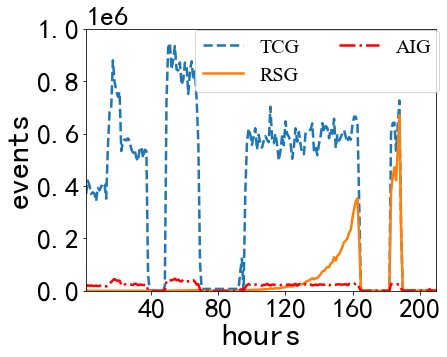

In [29]:
import matplotlib.pyplot as plt
from pylab import *                                 
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.subplots(figsize=(6.4,5.2))
x0= np.arange(1,day4)
x2= np.arange(1,day2)
x3= np.arange(1,day3)
y0=OGevents
y2=RSGevents
y3=AIGevents
# O, = plt.plot(x0, y0, marker='.', mec='blue', mfc='w',label=u'POG',linewidth = 1,markersize=2)
# B, = plt.plot(x2, y2, marker='.', mec='purple', mfc='w',label=u'RSG',linewidth = 1,markersize=2)
# C, = plt.plot(x3, y3, marker='.', mec='red', mfc='w',label=u'AIG',linewidth = 1,markersize=2)
O, = plt.plot(x0, y0,linestyle = 'dashed' ,  mec='blue', mfc='w',label=u'TCG',linewidth = 2.5,markersize=2)
B, = plt.plot(x2, y2, mec='purple', mfc='w',label=u'RSG',linewidth = 2.5,markersize=2)
C, = plt.plot(x3, y3, linestyle = '-.',color='red', mfc='w',label=u'AIG',linewidth = 2.5,markersize=2)
font1 = {'family':'Times New Roman',
         'weight':'normal',
         'size':20
         }
legend = plt.legend(handles=[O,B,C], prop=font1,loc='lower center',ncol=2,bbox_to_anchor=(0.66,0.72))
x_major_locator=MultipleLocator(30)
y_major_locator=MultipleLocator(200000)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.margins(0)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
plt.subplots_adjust(bottom=0.18,left = 0.14)
plt.xlabel("hours",fontsize =32) 
plt.ylabel("events",fontsize = 32)
plt.ylim(0,1000000)
x_major_locator=MultipleLocator(40)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.tick_params(axis='both', which='major', labelsize=28)
plt.gca().yaxis.get_offset_text().set_fontsize(28)

#plt.title("\") 
#plt.axis('off')
#plt.title('',fontsize = 14)
plt.savefig("events_change_optc.png",dpi=500,bbox_inches = 'tight')
plt.show()


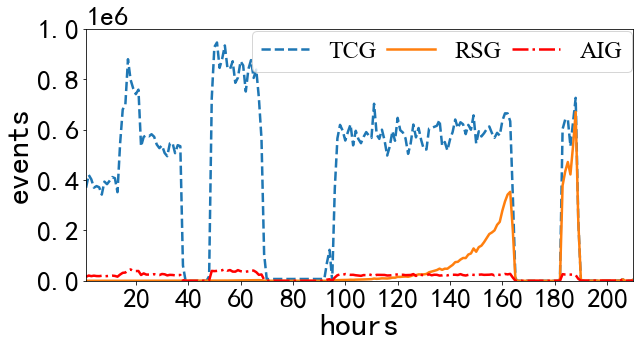

In [31]:
import matplotlib.pyplot as plt
from pylab import *                                 
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.subplots(figsize=(10,5))
x0= np.arange(1,day4)
x2= np.arange(1,day2)
x3= np.arange(1,day3)
y0=OGevents
y2=RSGevents
y3=AIGevents
# O, = plt.plot(x0, y0, marker='.', mec='blue', mfc='w',label=u'POG',linewidth = 1,markersize=2)
# B, = plt.plot(x2, y2, marker='.', mec='purple', mfc='w',label=u'RSG',linewidth = 1,markersize=2)
# C, = plt.plot(x3, y3, marker='.', mec='red', mfc='w',label=u'AIG',linewidth = 1,markersize=2)
O, = plt.plot(x0, y0,linestyle = 'dashed' ,  mec='blue', mfc='w',label=u'TCG',linewidth = 2.5,markersize=2)
B, = plt.plot(x2, y2, mec='purple', mfc='w',label=u'RSG',linewidth = 2.5,markersize=2)
C, = plt.plot(x3, y3, linestyle = '-.',color='red', mfc='w',label=u'AIG',linewidth = 2.5,markersize=2)
font1 = {'family':'Times New Roman',
         'weight':'normal',
         'size':24
         }
legend = plt.legend(handles=[O,B,C], prop=font1,loc='lower center',ncol=3,bbox_to_anchor=(0.65,0.78),columnspacing=0.45)
x_major_locator=MultipleLocator(30)
y_major_locator=MultipleLocator(200000)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.margins(0)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
plt.subplots_adjust(bottom=0.18,left = 0.14)
plt.xlabel("hours",fontsize =32) 
plt.ylabel("events",fontsize = 32)
plt.ylim(0,1000000)
x_major_locator=MultipleLocator(20)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.tick_params(axis='both', which='major', labelsize=28)
plt.gca().yaxis.get_offset_text().set_fontsize(28)

#plt.title("\") 
#plt.axis('off')
#plt.title('',fontsize = 14)
plt.savefig("events_change_optc.png",dpi=500,bbox_inches = 'tight')
plt.show()


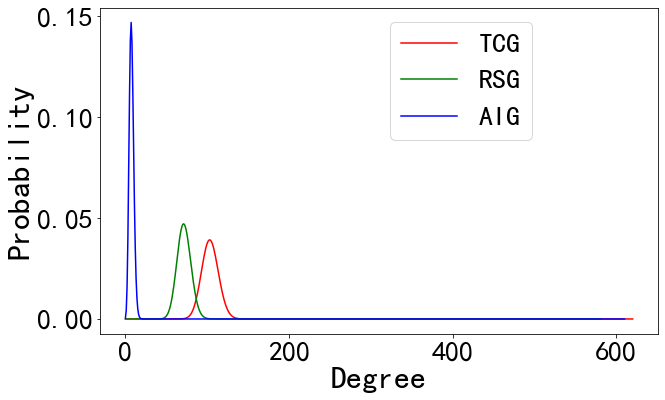

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import poisson
degree_OG = [d for n, d in OGraph.degree()]
degree_RSG = [d for n, d in RSGraph.degree()]
degree_AIG = [d for n, d in AIGraph.degree()]

OG_count = np.bincount(degree_OG)
RSG_count = np.bincount(degree_RSG)
AIG_count = np.bincount(degree_AIG)

OGdegrees = np.arange(len(OG_count))
RSGdegrees = np.arange(len(RSG_count))
AIGdegrees = np.arange(len(AIG_count))

# 拟合泊松分布
mean_OG = np.mean(degree_OG)
poisson_OG = poisson.pmf(OGdegrees, mean_OG)
mean_RSG = np.mean(degree_RSG)
poisson_RSG = poisson.pmf(RSGdegrees, mean_RSG)
mean_AIG = np.mean(degree_AIG)
poisson_AIG = poisson.pmf(AIGdegrees, mean_AIG)

# 绘制图形
plt.figure(figsize=(10, 6))
# plt.plot(degrees, degree_count / sum(degree_count), 'bo', label='Actual degree distribution')
plt.plot(OGdegrees, poisson_OG, 'r-', label='TCG')
plt.plot(RSGdegrees, poisson_RSG, 'g-', label='RSG')
plt.plot(AIGdegrees, poisson_AIG, 'b-', label='AIG')

plt.xlabel('Degree',fontsize = 32)
plt.ylabel('Probability',fontsize = 32)
# plt.title('Node Degree Distribution and Fitted Poisson Distribution')
plt.legend()
plt.grid(False)
ax=plt.gca()
ax.tick_params(axis='both', which='major', labelsize=28)
plt.gca().yaxis.get_offset_text().set_fontsize(30)
plt.legend(bbox_to_anchor=(0.8, 1),fontsize=28, ncol=1)
plt.savefig("degree_OPTC_Poisson.png",dpi=300,bbox_inches = 'tight')
plt.show()